In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
homes = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/homeprices.applied.econ.csv')

Understading the 'home prices' Dataset by getting the information and the first 5 observations

In [3]:
homes.info()

homes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


# Do homes with air conditioning have a higher sales price than homes without air conditioning?

Getting the number of rows on homes with air-condition and without air-condition

In [4]:
print(sum(homes.airco == 'no'))
print(sum(homes.airco == 'yes'))

373
173


Separating homes with air-condition and without air-condition into 2 separate variables. Individually get the information on each dataframes

In [5]:
home_aircon_yes = homes[(homes['airco'] == 'yes')]
home_aircon_yes.info()

home_aircon_no = homes[(homes['airco'] == 'no')]
home_aircon_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 373 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     173 non-null    float64
 1   lotsize   173 non-null    int64  
 2   bedrooms  173 non-null    int64  
 3   bathrms   173 non-null    int64  
 4   stories   173 non-null    int64  
 5   driveway  173 non-null    object 
 6   recroom   173 non-null    object 
 7   fullbase  173 non-null    object 
 8   gashw     173 non-null    object 
 9   airco     173 non-null    object 
 10  garagepl  173 non-null    int64  
 11  prefarea  173 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 17.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     373 non-null    float64
 1   lotsize   373 non-null    int64  
 2   bedrooms  373 non-

Plotting the histogram of those with and without air-conditioning vs the price. Does having an air-condition increase the price of the house.?

(array([ 48., 131.,  99.,  50.,  29.,   6.,   4.,   4.,   1.,   1.]),
 array([ 25000.,  40000.,  55000.,  70000.,  85000., 100000., 115000.,
        130000., 145000., 160000., 175000.]),
 <a list of 10 Patch objects>)

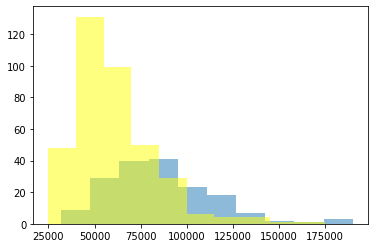

In [6]:
plt.hist(home_aircon_yes['price'], alpha=.5, )
plt.hist(home_aircon_no['price'], alpha=.5, color='yellow')


The curve does not fit into a Normal Distribution curve. Prices of homes with no air-ariconditioning and skewed more left, which indicates that a lot more of these homes maintains a price within that range.

In [7]:
print(stats.describe(home_aircon_yes['price']))
print(stats.describe(home_aircon_no['price']))

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)
DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)


We will use a P-value of .05

In [8]:
stats.ttest_ind(home_aircon_yes['price'], home_aircon_no['price'])

Ttest_indResult(statistic=11.862852780650169, pvalue=4.972721571759431e-29)

# Do homes with a full basement have a higher sales price than homes without a full basement?

In [9]:
home_basement_yes = homes[(homes['fullbase'] == 'yes')]
home_basement_yes.info()

home_basement_no = homes[(homes['fullbase'] == 'no')]
home_basement_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     191 non-null    float64
 1   lotsize   191 non-null    int64  
 2   bedrooms  191 non-null    int64  
 3   bathrms   191 non-null    int64  
 4   stories   191 non-null    int64  
 5   driveway  191 non-null    object 
 6   recroom   191 non-null    object 
 7   fullbase  191 non-null    object 
 8   gashw     191 non-null    object 
 9   airco     191 non-null    object 
 10  garagepl  191 non-null    int64  
 11  prefarea  191 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     355 non-null    float64
 1   lotsize   355 non-null    int64  
 2   bedrooms  355 non-

Though not perfect, the plot below looks like a more normal distribution.

(array([ 55., 119.,  80.,  44.,  30.,  16.,   7.,   2.,   0.,   2.]),
 array([ 25000.,  41500.,  58000.,  74500.,  91000., 107500., 124000.,
        140500., 157000., 173500., 190000.]),
 <a list of 10 Patch objects>)

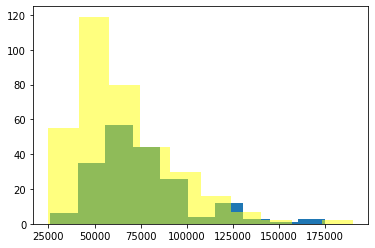

In [22]:
plt.hist(home_basement_yes['price'], label='yes')
plt.hist(home_basement_no['price'], alpha=.5, color='yellow', label='no')

In [11]:
print(stats.describe(home_basement_yes['price']))
print(stats.describe(home_basement_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [12]:
stats.ttest_ind(home_basement_yes['price'],home_basement_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [13]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(home_basement_yes['price'], home_basement_no['price'])

'The difference in means at the 95% confidence interval (two-tail) is between -15032.294775656886 and -5801.544262762097.'

We can compare the means of those with and without a basement

[[Text(0, 0, 'With Basement'), Text(0, 0, 'Without Basement')]]

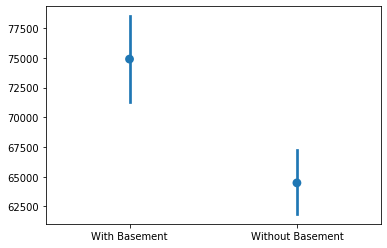

In [14]:
import seaborn as sns

pplot = sns.pointplot(data=[home_basement_yes['price'], 
                        home_basement_no['price']], join=False)

pplot.set(xticklabels = ['With Basement', 'Without Basement'])